# E-Commerce Sales Analytics Pipeline
### Project Objectives
This project involves creating an ETL pipeline to process and analyze e-commerce sales data. The objectives include:
- Extracting data from a CSV file.
- Cleaning and transforming the data.
- Analyzing key sales trends, top products, and customer behavior through visualizations.
- Documenting insights and findings.

### Dataset Path
The dataset for this project is located at: `/content/ecom.csv`


In [7]:
!pip install pandas numpy matplotlib seaborn
!pip install tabulate



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Print confirmation
print("Libraries imported successfully!")


Libraries imported successfully!


In [9]:
from tabulate import tabulate

# Load the dataset with the correct encoding
data = pd.read_csv('/content/ecom.csv', encoding='ISO-8859-1')

# Print confirmation and show the first few rows as a table
print("Dataset loaded successfully!")
print(tabulate(data.head(), headers='keys', tablefmt='grid'))




Dataset loaded successfully!
+----+-------------+-------------+-------------------------------------+------------+----------------+-------------+--------------+----------------+
|    |   InvoiceNo | StockCode   | Description                         |   Quantity | InvoiceDate    |   UnitPrice |   CustomerID | Country        |
+====+=============+=============+=====================================+============+================+=============+==============+================+
|  0 |      536365 | 85123A      | WHITE HANGING HEART T-LIGHT HOLDER  |          6 | 12/1/2010 8:26 |        2.55 |        17850 | United Kingdom |
+----+-------------+-------------+-------------------------------------+------------+----------------+-------------+--------------+----------------+
|  1 |      536365 | 71053       | WHITE METAL LANTERN                 |          6 | 12/1/2010 8:26 |        3.39 |        17850 | United Kingdom |
+----+-------------+-------------+-------------------------------------+-----

In [10]:
# Check the structure of the dataset
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nColumn Names:")
print(data.columns)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Summary Statistics:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.

# Missing Values:

The Description column has missing values (540,455 non-null out of 541,909 rows).
The CustomerID column has many missing values (406,829 non-null out of 541,909 rows).


# Potential Data Issues:

There are negative values in the Quantity and UnitPrice columns (e.g., Quantity has a minimum of -80,995, and UnitPrice has a minimum of -11,062.06).
The InvoiceDate column is currently an object type, which we need to convert to datetime for analysis.

In [11]:
# Check for missing values
print("Missing Values in Each Column:")
print(tabulate(data.isnull().sum().reset_index(), headers=["Column", "Missing Values"], tablefmt="grid"))


Missing Values in Each Column:
+----+-------------+------------------+
|    | Column      |   Missing Values |
+====+=============+==================+
|  0 | InvoiceNo   |                0 |
+----+-------------+------------------+
|  1 | StockCode   |                0 |
+----+-------------+------------------+
|  2 | Description |             1454 |
+----+-------------+------------------+
|  3 | Quantity    |                0 |
+----+-------------+------------------+
|  4 | InvoiceDate |                0 |
+----+-------------+------------------+
|  5 | UnitPrice   |                0 |
+----+-------------+------------------+
|  6 | CustomerID  |           135080 |
+----+-------------+------------------+
|  7 | Country     |                0 |
+----+-------------+------------------+


In [12]:
# Fill missing Description with "Unknown" and drop rows where CustomerID is missing
data.loc[:, 'Description'] = data['Description'].fillna('Unknown')
data = data.dropna(subset=['CustomerID'])

# Confirm missing values after handling them
print("\nMissing Values After Handling:")
print(tabulate(data.isnull().sum().reset_index(), headers=["Column", "Missing Values"], tablefmt="grid"))



Missing Values After Handling:
+----+-------------+------------------+
|    | Column      |   Missing Values |
+====+=============+==================+
|  0 | InvoiceNo   |                0 |
+----+-------------+------------------+
|  1 | StockCode   |                0 |
+----+-------------+------------------+
|  2 | Description |                0 |
+----+-------------+------------------+
|  3 | Quantity    |                0 |
+----+-------------+------------------+
|  4 | InvoiceDate |                0 |
+----+-------------+------------------+
|  5 | UnitPrice   |                0 |
+----+-------------+------------------+
|  6 | CustomerID  |                0 |
+----+-------------+------------------+
|  7 | Country     |                0 |
+----+-------------+------------------+


# Handle Negative or Zero Values
Filtering out rows where the Quantity or UnitPrice is negative or zero, as those are likely errors or invalid entries.

In [13]:
# Remove rows with negative or zero values in Quantity or UnitPrice
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Confirm the shape of the dataset after filtering
print("\nDataset shape after removing negative or zero values:")
print(data.shape)



Dataset shape after removing negative or zero values:
(397884, 8)


# Converting InvoiceDate Datetime Type

In [14]:
# Convert 'InvoiceDate' to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Validate data types
print("\nData Types After Conversion:")
print(data.dtypes)



Data Types After Conversion:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


# Data Transformation

Create new features/column (like Revenue).

Ensure proper grouping and aggregation (like daily revenue).

Filter out invalid data (if needed).

In [15]:
# Create a new 'Revenue' column
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Show the first few rows to confirm the new column
print("First 5 rows with Revenue column:")
print(tabulate(data[['InvoiceNo', 'Quantity', 'UnitPrice', 'Revenue']].head(), headers='keys', tablefmt='grid'))


First 5 rows with Revenue column:
+----+-------------+------------+-------------+-----------+
|    |   InvoiceNo |   Quantity |   UnitPrice |   Revenue |
+====+=============+============+=============+===========+
|  0 |      536365 |          6 |        2.55 |     15.3  |
+----+-------------+------------+-------------+-----------+
|  1 |      536365 |          6 |        3.39 |     20.34 |
+----+-------------+------------+-------------+-----------+
|  2 |      536365 |          8 |        2.75 |     22    |
+----+-------------+------------+-------------+-----------+
|  3 |      536365 |          6 |        3.39 |     20.34 |
+----+-------------+------------+-------------+-----------+
|  4 |      536365 |          6 |        3.39 |     20.34 |
+----+-------------+------------+-------------+-----------+


# Grouping and Aggregation

Calculate the daily revenue to analyze sales trends over time. We’ll group the data by the InvoiceDate and sum up the revenue for each day.

In [16]:
# Truncate time from InvoiceDate to keep only the date
data['InvoiceDate'] = data['InvoiceDate'].dt.date

# Group by 'InvoiceDate' and calculate daily revenue again
daily_revenue = data.groupby('InvoiceDate')['Revenue'].sum().reset_index()

# Show the first few rows of daily revenue
print("First 5 rows of daily revenue (with time truncated):")
print(tabulate(daily_revenue.head(), headers='keys', tablefmt='grid'))



First 5 rows of daily revenue (with time truncated):
+----+---------------+-----------+
|    | InvoiceDate   |   Revenue |
+====+===============+===========+
|  0 | 2010-12-01    |   46376.5 |
+----+---------------+-----------+
|  1 | 2010-12-02    |   47316.5 |
+----+---------------+-----------+
|  2 | 2010-12-03    |   23921.7 |
+----+---------------+-----------+
|  3 | 2010-12-05    |   31771.6 |
+----+---------------+-----------+
|  4 | 2010-12-06    |   31215.6 |
+----+---------------+-----------+


# Filtering Invalid Data

Making sure there are no additional invalid entries like zero revenue.



In [17]:
# Remove rows where the revenue is zero
data = data[data['Revenue'] > 0]

# Confirm the shape of the dataset after filtering
print("\nDataset shape after removing zero revenue:")
print(data.shape)



Dataset shape after removing zero revenue:
(397884, 9)


# Cleaned Data and save to CSV file

In [18]:
# Save the cleaned dataset to a new CSV file
data.to_csv('/content/cleaned_ecom_data.csv', index=False)

# Confirm the file is saved
print("Cleaned dataset saved successfully as 'cleaned_ecom_data.csv'.")


Cleaned dataset saved successfully as 'cleaned_ecom_data.csv'.


# Daily Revenue Trend

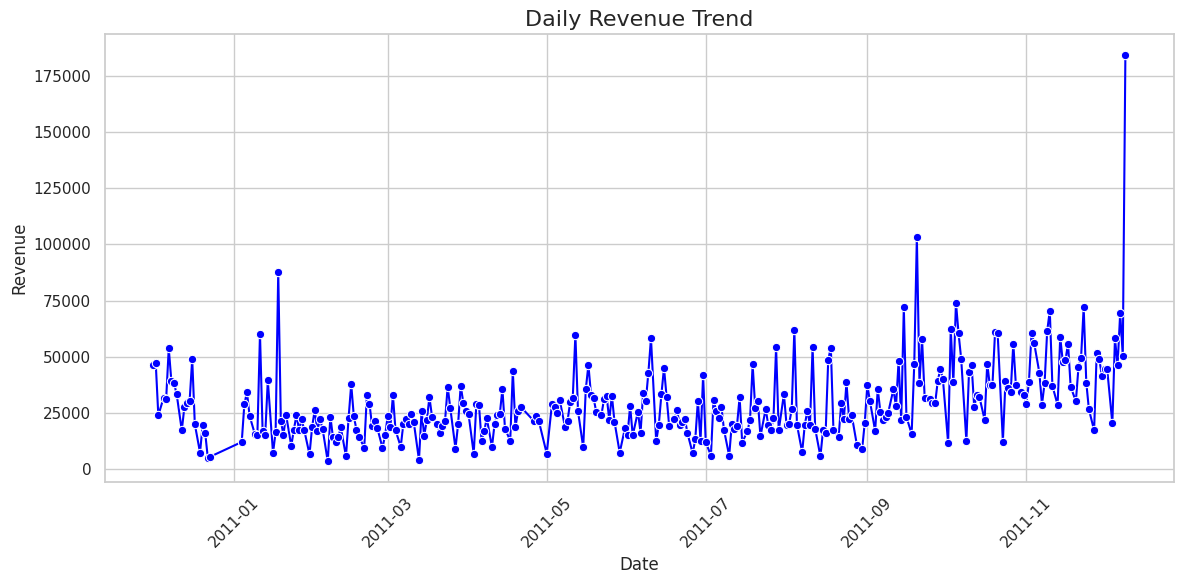

In [19]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Aggregate daily revenue
daily_revenue = data.groupby('InvoiceDate')['Revenue'].sum().reset_index()

# Plot daily revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='Revenue', data=daily_revenue, color='blue', marker='o')

# Customize the plot
plt.title('Daily Revenue Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Top-Selling Products by Revenue



Top 10 Products by Revenue (Rounded):
+------------------------------------+-----------+
|            Description             |  Revenue  |
+------------------------------------+-----------+
|    PAPER CRAFT , LITTLE BIRDIE     | 168469.6  |
|      REGENCY CAKESTAND 3 TIER      | 142592.95 |
| WHITE HANGING HEART T-LIGHT HOLDER | 100448.15 |
|      JUMBO BAG RED RETROSPOT       | 85220.78  |
|   MEDIUM CERAMIC TOP STORAGE JAR   | 81416.73  |
|              POSTAGE               | 77803.96  |
|           PARTY BUNTING            | 68844.33  |
|   ASSORTED COLOUR BIRD ORNAMENT    | 56580.34  |
|               Manual               | 53779.93  |
|         RABBIT NIGHT LIGHT         |  51346.2  |
+------------------------------------+-----------+


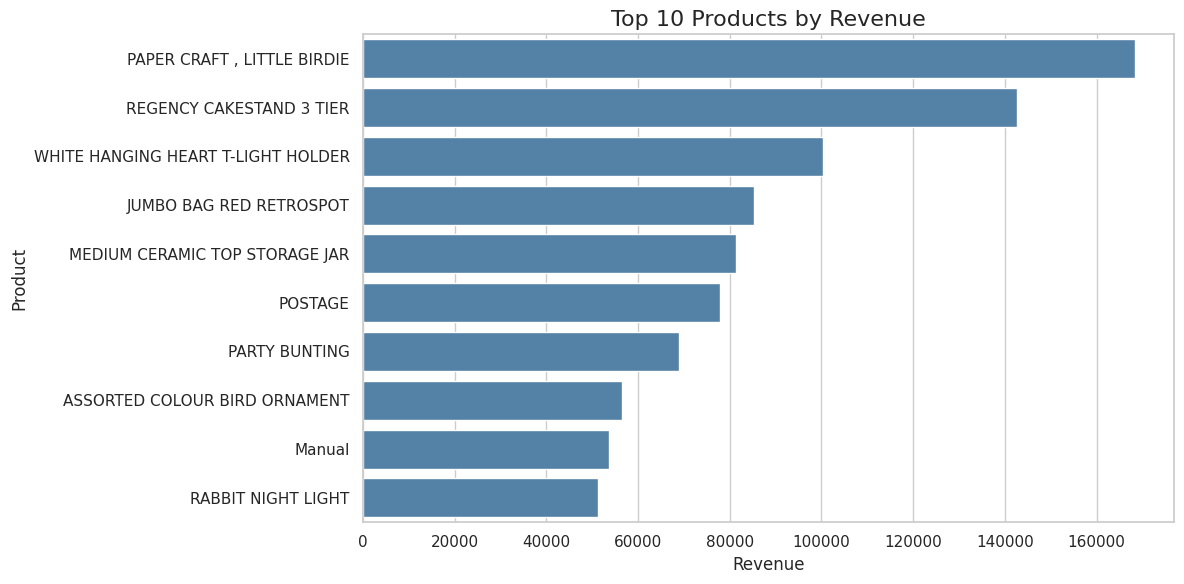

In [22]:
# Calculate top 10 products by revenue
top_products = data.groupby('Description')['Revenue'].sum().reset_index()
top_products = top_products.sort_values(by='Revenue', ascending=False).head(10)

# Round revenue to two decimal places
top_products['Revenue'] = top_products['Revenue'].round(2)

# Display the table with rounded values
print("\nTop 10 Products by Revenue (Rounded):")
print(tabulate(top_products, headers='keys', tablefmt='pretty', showindex=False))

# Plot the bar chart with a uniform blue color
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Revenue', y='Description', color='steelblue')
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

# Total Revenue by Country

Top 10 Countries by Revenue:
+----+--------+----------------+------------+
|    |   Rank | Country        |    Revenue |
+====+========+================+============+
|  0 |      1 | United Kingdom | 7308391.55 |
+----+--------+----------------+------------+
|  1 |      2 | Netherlands    |  285446.34 |
+----+--------+----------------+------------+
|  2 |      3 | EIRE           |  265545.90 |
+----+--------+----------------+------------+
|  3 |      4 | Germany        |  228867.14 |
+----+--------+----------------+------------+
|  4 |      5 | France         |  209024.05 |
+----+--------+----------------+------------+
|  5 |      6 | Australia      |  138521.31 |
+----+--------+----------------+------------+
|  6 |      7 | Spain          |   61577.11 |
+----+--------+----------------+------------+
|  7 |      8 | Switzerland    |   56443.95 |
+----+--------+----------------+------------+
|  8 |      9 | Belgium        |   41196.34 |
+----+--------+----------------+------------+
|  9 

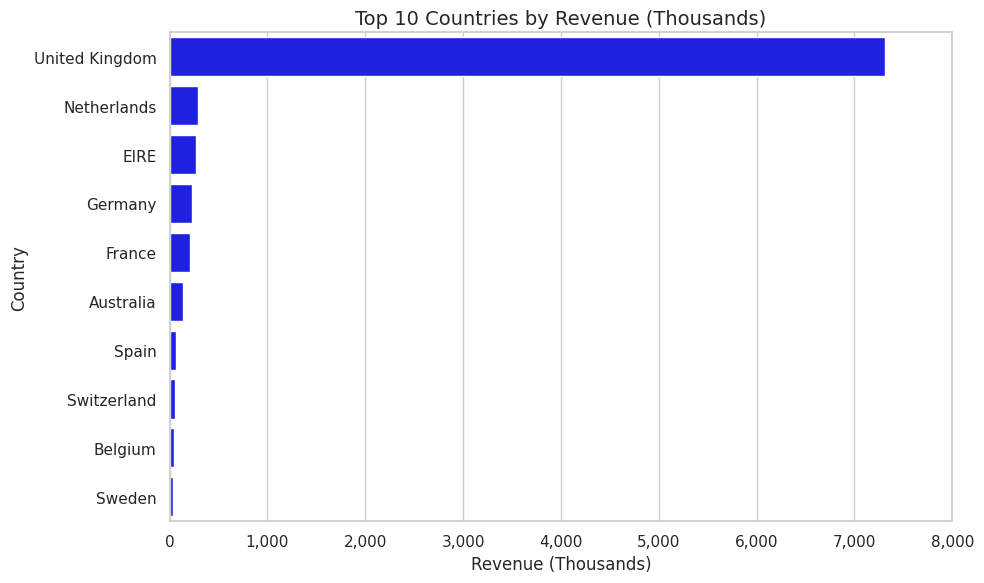

In [24]:
# Aggregate revenue by country
country_revenue = data.groupby('Country')['Revenue'].sum().reset_index()

# Sort countries by revenue in descending order
country_revenue = country_revenue.sort_values(by='Revenue', ascending=False)

# Add a 'Rank' column for clarity
country_revenue.reset_index(drop=True, inplace=True)
country_revenue['Rank'] = country_revenue.index + 1

# Display the top 10 countries in a formatted table with two decimal places, only showing Rank, Country, and Revenue
print("Top 10 Countries by Revenue:")
print(
    tabulate(
        country_revenue.head(10)[['Rank', 'Country', 'Revenue']],
        headers=['Rank', 'Country', 'Revenue'],
        tablefmt='grid',
        floatfmt=".2f",
    )
)

# Scale the revenue by dividing it by 1000 to display in thousands
country_revenue['Revenue'] = country_revenue['Revenue'] / 1000

# Plotting the top 10 countries by revenue
plt.figure(figsize=(10, 6))
sns.barplot(
    data=country_revenue.head(10), x='Revenue', y='Country', color='blue'
)
plt.title('Top 10 Countries by Revenue (Thousands)', fontsize=14)
plt.xlabel('Revenue (Thousands)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Format the x-axis labels to show values in thousands with commas
plt.xticks(
    ticks=plt.gca().get_xticks(),
    labels=[f'{x:,.0f}' for x in plt.gca().get_xticks()]
)

plt.tight_layout()
plt.show()


# Unique Customers and Purchase Frequency

Total Unique Customers: The count of distinct CustomerIDs in the dataset.

Purchase Frequency: The number of times each customer has made a purchase.

In [26]:
# Calculate total unique customers
unique_customers = data['CustomerID'].nunique()
print(f"Total Unique Customers: {unique_customers}")

# Calculate purchase frequency per customer
purchase_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()
print(f"\nAverage Purchase Frequency per Customer: {purchase_frequency.mean():.2f}")

# Calculate total revenue generated per customer
customer_revenue = data.groupby('CustomerID')['Revenue'].sum().reset_index()

# Rename columns for clarity
customer_revenue.columns = ['CustomerID', 'TotalRevenue']

# Display the top 5 customers by revenue
top_customers = customer_revenue.sort_values(by='TotalRevenue', ascending=False).head(5)
print("\nTop 5 Customers by Revenue:")
print(tabulate(top_customers, headers='keys', tablefmt='grid', floatfmt=".2f"))


Total Unique Customers: 4338

Average Purchase Frequency per Customer: 4.27

Top 5 Customers by Revenue:
+------+--------------+----------------+
|      |   CustomerID |   TotalRevenue |
+======+==============+================+
| 1689 |     14646.00 |      280206.02 |
+------+--------------+----------------+
| 4201 |     18102.00 |      259657.30 |
+------+--------------+----------------+
| 3728 |     17450.00 |      194550.79 |
+------+--------------+----------------+
| 3008 |     16446.00 |      168472.50 |
+------+--------------+----------------+
| 1879 |     14911.00 |      143825.06 |
+------+--------------+----------------+


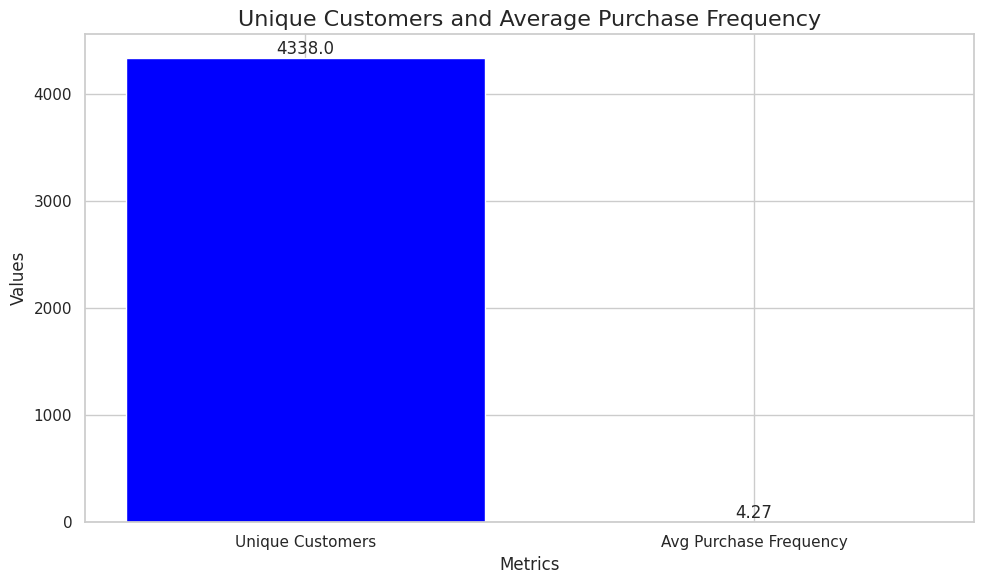

In [30]:
# Bar Chart for Unique Customers and Average Purchase Frequency
plt.figure(figsize=(10, 6))

# Bar chart for total unique customers and average purchase frequency
bars = plt.bar(['Unique Customers', 'Avg Purchase Frequency'], [unique_customers, avg_purchase_frequency], color=['blue', 'green'])

# Add the exact values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Unique Customers and Average Purchase Frequency', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


# Sales by Time

Aggregating Revenue by Month

First few rows of monthly revenue:
+----+-------------+-----------+
|    | YearMonth   |   Revenue |
+====+=============+===========+
|  0 | 2010-12     |    572714 |
+----+-------------+-----------+
|  1 | 2011-01     |    569445 |
+----+-------------+-----------+
|  2 | 2011-02     |    447137 |
+----+-------------+-----------+
|  3 | 2011-03     |    595501 |
+----+-------------+-----------+
|  4 | 2011-04     |    469200 |
+----+-------------+-----------+


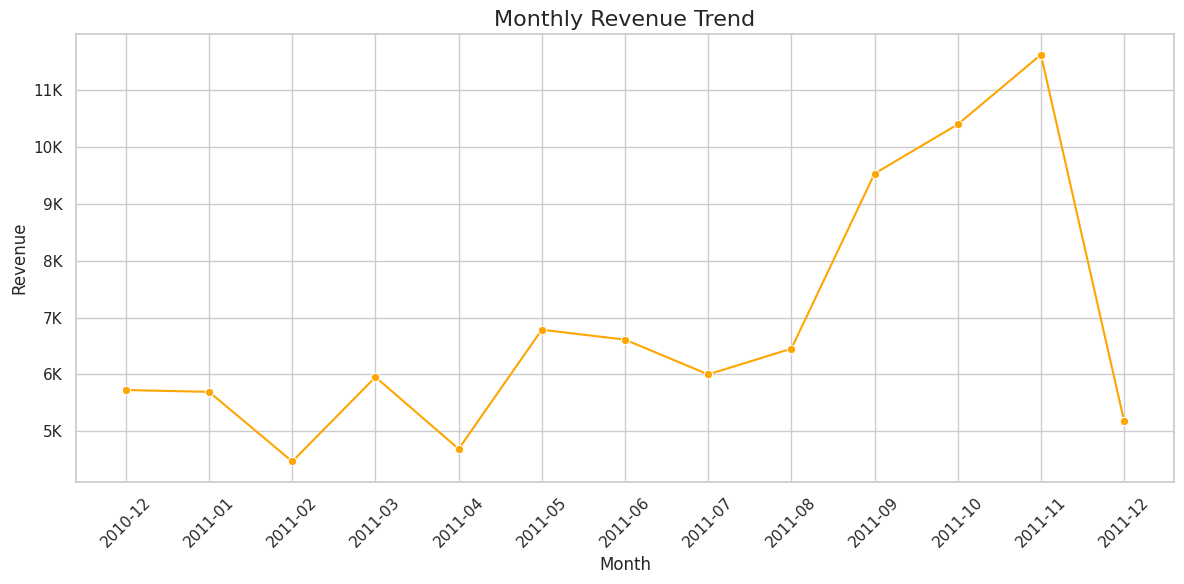

In [36]:
# Convert 'InvoiceDate' to datetime type if not already done
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Extract year and month from 'InvoiceDate' as 'YearMonth' column
data['YearMonth'] = data['InvoiceDate'].apply(lambda x: str(x.year) + '-' + str(x.month).zfill(2))

# Aggregate monthly revenue
monthly_revenue = data.groupby('YearMonth')['Revenue'].sum().reset_index()

# Show the first few rows of monthly revenue
print("First few rows of monthly revenue:")
print(tabulate(monthly_revenue.head(), headers='keys', tablefmt='grid'))

# Plot the monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Revenue', data=monthly_revenue, color='orange', marker='o')

# Customize the plot
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)

# Format y-axis to show revenue in hundreds of thousands (without scientific notation)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000:.0f}K'))

# Format x-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


# Sales by Time

Weekly Revenue

First few rows of weekly revenue:
+----+------------+-----------+
|    | YearWeek   |   Revenue |
+====+============+===========+
|  0 | 2010-W48   |  149386   |
+----+------------+-----------+
|  1 | 2010-W49   |  213448   |
+----+------------+-----------+
|  2 | 2010-W50   |  163771   |
+----+------------+-----------+
|  3 | 2010-W51   |   46109.1 |
+----+------------+-----------+
|  4 | 2011-W01   |  114865   |
+----+------------+-----------+


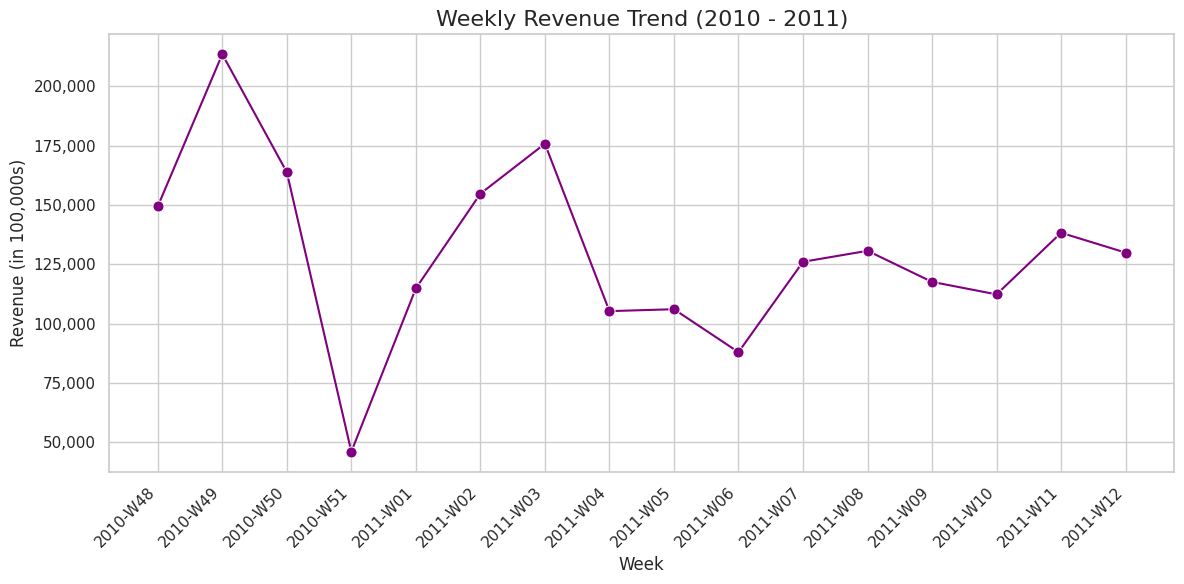

In [39]:
# Extract the year and week from 'InvoiceDate' to group by week
data['YearWeek'] = data['InvoiceDate'].apply(lambda x: str(x.year) + '-W' + str(x.isocalendar()[1]).zfill(2))

# Aggregate weekly revenue
weekly_revenue = data.groupby('YearWeek')['Revenue'].sum().reset_index()

# Show the first few rows of weekly revenue
print("First few rows of weekly revenue:")
print(tabulate(weekly_revenue.head(), headers='keys', tablefmt='grid'))

# Limit data to the last few weeks of 2010 and the first weeks of 2011
# You can adjust the date range if necessary
weekly_revenue_filtered = weekly_revenue[(weekly_revenue['YearWeek'] >= '2010-W48') & (weekly_revenue['YearWeek'] <= '2011-W12')]

# Plot the weekly revenue trend with a line and markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearWeek', y='Revenue', data=weekly_revenue_filtered, color='purple', marker='o', markersize=8)

# Customize the plot
plt.title('Weekly Revenue Trend (2010 - 2011)', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue (in 100,000s)', fontsize=12)

# Format y-axis to show revenue in 100,000s (correct labeling without scientific notation)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Rotate x-axis labels for better readability and adjust spacing
plt.xticks(rotation=45, ha='right')

# Format x-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


# Sales by Time

Daily Revenue

First few rows of daily revenue:
+----+---------------------+-----------+
|    | InvoiceDate         |   Revenue |
+====+=====================+===========+
|  0 | 2010-12-01 00:00:00 |   46376.5 |
+----+---------------------+-----------+
|  1 | 2010-12-02 00:00:00 |   47316.5 |
+----+---------------------+-----------+
|  2 | 2010-12-03 00:00:00 |   23921.7 |
+----+---------------------+-----------+
|  3 | 2010-12-05 00:00:00 |   31771.6 |
+----+---------------------+-----------+
|  4 | 2010-12-06 00:00:00 |   31215.6 |
+----+---------------------+-----------+


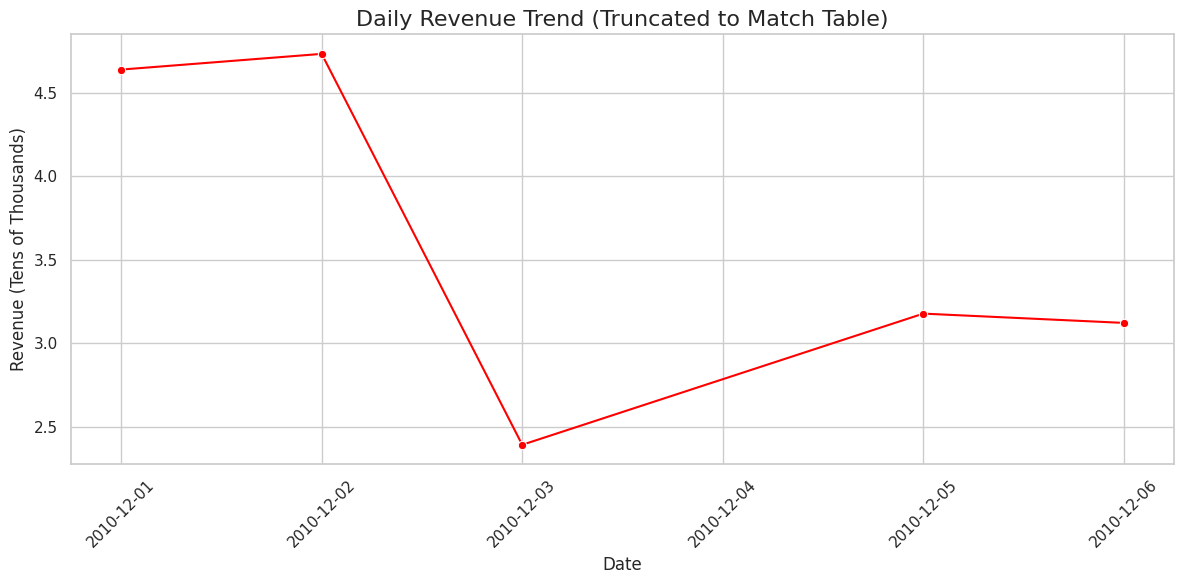

In [41]:
# Aggregate daily revenue
daily_revenue = data.groupby('InvoiceDate')['Revenue'].sum().reset_index()

# Show the first few rows of daily revenue
print("First few rows of daily revenue:")
print(tabulate(daily_revenue.head(), headers='keys', tablefmt='grid'))

# Truncate the data to match the range of dates in the table (first 5 rows)
truncated_daily_revenue = daily_revenue.head()

# Plot the daily revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='Revenue', data=truncated_daily_revenue, color='red', marker='o')

# Customize the plot
plt.title('Daily Revenue Trend (Truncated to Match Table)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (Tens of Thousands)', fontsize=12)
plt.xticks(rotation=45)

# Format y-axis to show revenue in tens of thousands
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/10000:.1f}'))

# Format x-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


# Key Finds and Critical Takeaways

*   **Data Cleaning and Preparation:** The initial dataset contained missing values in the 'Description' and 'CustomerID' columns. Missing 'Description' values were filled with "Unknown," and rows with missing 'CustomerID' values were removed. The data also had negative values in 'Quantity' and 'UnitPrice', which were removed. Additionally, the 'InvoiceDate' column was converted to a datetime type.

*   **Daily Revenue Trends:**  Daily revenue was calculated by grouping the data by 'InvoiceDate' and summing the revenue for each day. A visualization of this data showed the daily revenue trend over time.
*   **Top-Selling Products:** The analysis identified the top 10 products by revenue, with "PAPER CRAFT, LITTLE BIRDIE" being the highest, followed by "REGENCY CAKESTAND 3 TIER" and "WHITE HANGING HEART T-LIGHT HOLDER".

*   **Revenue by Country:** The United Kingdom generated the highest revenue, followed by the Netherlands and EIRE. The analysis also presented a ranking of the top 10 countries by revenue.

*   **Customer Analysis:** The total number of unique customers was 4338, with an average purchase frequency of 4.27 per customer. The top 5 customers by revenue were also identified.

*   **Monthly Revenue Trends**: A monthly analysis of revenue showed a trend over time.
*   **Weekly Revenue Trends**: Weekly revenue was also analyzed, showing a trend from the end of 2010 to the beginning of 2011.


**Specific Trends, Patterns, and Anomalies:**

*   **Data Quality Issues:** The presence of missing values and negative quantities and unit prices indicates potential data quality issues that needed to be addressed before the analysis.

*   **Dominance of the UK Market**: The United Kingdom significantly outperformed other countries in terms of revenue, which may indicate a strong local market or the business's primary focus.

*   **Top Products:** The top-selling products reveal what items are most popular among customers and which could potentially be promoted further.

*   **Customer Behavior:** The average purchase frequency suggests that most customers make multiple purchases, which could indicate customer loyalty or repeat business.

*   **Time-Based Trends:** The monthly revenue analysis reveals the business's overall sales pattern over the months while the weekly view shows the shorter term trends.

These findings provide a comprehensive overview of the e-commerce sales data, highlighting areas for potential business improvement.


**Actions the Business Should Take:**

*   **Address Data Quality Issues:** Implement better data validation processes to prevent negative or zero values for 'Quantity' and 'UnitPrice'. This will ensure the accuracy of future analyses and reporting. The business should also investigate the causes of missing CustomerID data, as this can hinder customer behavior analysis.

*   **Leverage Top-Selling Products:** Focus on promoting top-selling products such as **"PAPER CRAFT, LITTLE BIRDIE," "REGENCY CAKESTAND 3 TIER," and "WHITE HANGING HEART T-LIGHT HOLDER"**. Consider bundling these products or featuring them in marketing campaigns to boost sales.

*  **UK Market Dominance:** Given the UK's significant contribution to revenue, the business should maintain a strong focus on this market. Further research on why this market performs so well could identify strategies that could be applied to other markets.

*   **Target High-Value Customers**: Given that the average customer purchase frequency is 4.27, the business should target its most frequent customers and top revenue generators. Consider implementing loyalty programs or personalized offers for frequent buyers to retain them and encourage repeat purchases.

**Opportunities for Optimization:**

*   **Pricing Optimization:** Analyze the price points of top-selling products to identify any opportunities for price adjustments. Also, investigate if there are product categories that could benefit from price changes.

*   **Marketing Optimization:**
    *   **Focus Marketing Efforts:** Given the dominance of the UK market, allocate marketing resources accordingly while still exploring strategies for growing other markets.

    *   **Product-Specific Campaigns:** Create marketing campaigns that feature top-selling products and products that are performing below average. These targeted campaigns can promote products that have the highest potential for growth.

    *   **Customer Segmentation:** Segment customers based on their purchase frequency and spending habits and tailor marketing messages and promotions.

*   **Inventory Optimization:**
    *   **Stock Management:** Ensure that top-selling products are always in stock to meet customer demand. Conversely, reduce inventory levels for products that are underperforming to reduce storage costs.

    *   **Seasonal Trends:** The business should consider the monthly and weekly trends, especially as the data shows a clear increase in revenue in the weeks leading up to the end of the year and the beginning of the new year, to better prepare for the demand.
    
*   **Sales by Time Analysis**:  The business should leverage the information about sales trends over time. It can prepare for peak sales periods and optimize staffing and inventory accordingly.

By addressing these areas, the business can make data-driven decisions to improve revenue, customer satisfaction, and overall efficiency.
